In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm



In [2]:
dftrain=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Train_round1.csv')

In [3]:
dftest=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/US_WF_Test_round1.csv', low_memory=False)

In [22]:
model = sm.logit(formula='ig ~ nuveen_t12m_sales_hy_taxable+nuveen_t24m_sales_ig_taxable+nuveen_t12m_netsl_ig_taxable+\
                 asset2p', data=dftrain).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.035417
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                     ig   No. Observations:                 4824
Model:                          Logit   Df Residuals:                     4819
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.3859
Time:                        19:17:41   Log-Likelihood:                -170.85
converged:                       True   LL-Null:                       -278.21
Covariance Type:            nonrobust   LLR p-value:                 2.577e-45
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.6614      0.278    -20.374      0.00

In [23]:

Xtest = dftest[['nuveen_t12m_sales_hy_taxable', 'asset2p', 'nuveen_t24m_sales_ig_taxable', 'nuveen_t12m_netsl_ig_taxable']]
ytest = dftest['ig']
  
ig_yhat = model.predict(Xtest)


In [24]:
dftest['ig_yhat'] = ig_yhat

In [27]:
print(ig_yhat)

1049    1.000000e+00
614     1.000000e+00
666     9.999997e-01
713     9.999983e-01
795     9.999972e-01
            ...     
990     4.103911e-14
561     1.913172e-15
55      2.604020e-19
361     9.620727e-20
2862    7.195029e-28
Length: 4824, dtype: float64


In [29]:

dftest = dftest.sort_values(by = 'ig_yhat', ascending = False)


In [33]:
dftest['IG_Taxable_Quintile'] = pd.qcut(dftest['ig_yhat'], 2, labels=[i for i in range (2, 0, -1)])

In [34]:
print(dftest['IG_Taxable_Quintile'])

1049    1
614     1
666     1
713     1
795     1
       ..
990     2
561     2
55      2
361     2
2862    2
Name: IG_Taxable_Quintile, Length: 4824, dtype: category
Categories (2, int64): [2 < 1]


In [35]:
dftest['IG_Taxable_Quintile'] = dftest['IG_Taxable_Quintile'].astype('int')

In [36]:
dftest['IG_Taxable_Quintile'].value_counts().reset_index(name='count')


,index,count
0,2,3714
1,1,1110


In [37]:

buyers = pd.crosstab(dftest['IG_Taxable_Quintile'], dftest['ig'], normalize='index')



In [38]:
print(buyers)

ig                          0         1
IG_Taxable_Quintile                    
1                    0.971171  0.028829
2                    0.997038  0.002962


In [16]:
 dftest.groupby('IG_Taxable_Quintile')['nuveen_t3m_sales_ig_taxable'].mean()

IG_Taxable_Quintile
1    2546.586622
2    1857.779238
Name: nuveen_t3m_sales_ig_taxable, dtype: float64

In [17]:
dftest['IG_Taxable_Quintile'] = dftest['IG_Taxable_Quintile'].replace([1], 3)
dftest['IG_Taxable_Quintile'] = dftest['IG_Taxable_Quintile'].replace([2], 4)

<AxesSubplot:title={'center':'Proportion of Advisors Buying 2+ Asset Classes and Buying Investment Grade Bond Funds'}, xlabel='IG_Taxable_Quintile'>

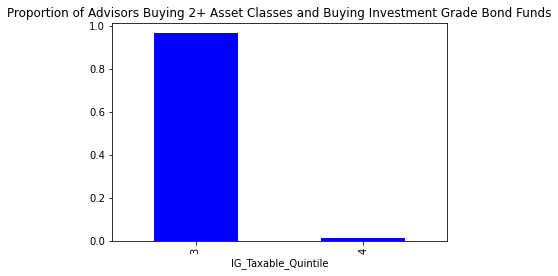

In [18]:
dftest.groupby(by = "IG_Taxable_Quintile")['asset2p'].mean().plot(kind = "bar", title="Proportion of Advisors Buying 2+ Asset Classes and Buying Investment Grade Bond Funds", color='blue')


<AxesSubplot:title={'center':'Net Sales of Investment Grade Taxable by Model Group for Investment Grade Sales'}, xlabel='IG_Taxable_Quintile'>

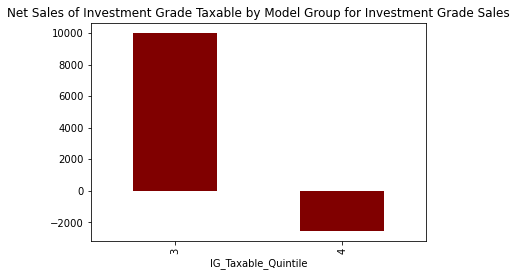

In [19]:
dftest.groupby(by = "IG_Taxable_Quintile")['nuveen_t12m_netsl_ig_taxable'].mean().plot(kind = "bar", title="Net Sales of Investment Grade Taxable by Model Group for Investment Grade Sales", color='maroon')


In [21]:
dftest.to_csv('C:/Users/tdougherty1/Desktop/AA490 Spring23/Wells Fargo/WFTest.csv')